In [1]:
# Chapter 3: Adding Layers

import numpy as np

inputs = [
    [1, 2, 3, 2.5], 
    [2, 5, -1, 2],
    [-1.5, 2.7, 3.3, -0.8]
]

weights = [
    [0.2, 0.8, -0.5, 1], 
    [0.5, -0.91, 0.26, -0.5], 
    [-0.26, -0.27, 0.17, 0.87]
]

biases = [2, 3, 0.5]

weights2 = [
    [0.1, -0.14, 0.5],
    [-0.5, 0.12, -0.33],
    [-0.44, 0.73, -0.13]
]

biases2 = [-1, 2, -0.5]

In [2]:
layer1_outputs = np.dot(inputs, np.array(weights).T) + biases
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2

print(layer2_outputs)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


In [3]:
import nnfs
print(nnfs.__version__)
nnfs.init()


0.5.1


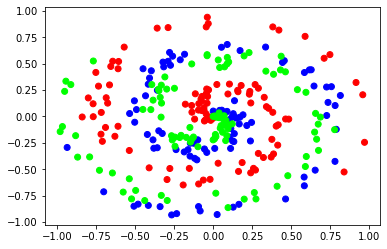

In [4]:
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg")
plt.show()

In [5]:
# Dense Layer

class Layer_Dense:

    # Layer init
    def __init__(self, n_inputs, n_neurons):
        # initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        # Calculates ouput values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

In [6]:
X, y = spiral_data(samples=100, classes=3)

# Create a dense layer with 2 Inputs and 3 Neurons (Outputs)
dense1 = Layer_Dense(2, 3)
# Forward pass these inputs into the neuron
dense1.forward(X)
# Output from an array that contains values from each neuron
output = dense1.output[:5]
# print first 5 out of 100 values
print(output)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.11171044e-04 -5.11007493e-05 -1.12099799e-04]
 [ 2.99257295e-06 -2.69126613e-04 -1.45165104e-04]
 [ 8.95101766e-05 -4.30442247e-04 -1.68079801e-04]
 [-3.49893759e-04 -3.07208364e-04 -4.33002861e-04]]


In [ ]:
# Chapter 4: Activation Functions.

In this chapter, we will tackle a few of the activation functions and discuss their roles. We use
different activation functions for different cases, and understanding how they work can help you
properly pick which of them is best for your task. The activation function is applied to the output
of a neuron (or layer of neurons), which modifies outputs. We use activation functions because if
the activation function itself is nonlinear, it allows for neural networks with usually two or more
hidden layers to map nonlinear functions. 

In [ ]:
# Different Types of Activation Functions

<font size="8"> Step Activation Function </font>
<br />
<br />
if the weights · inputs + bias results in a value greater than 0, the neuron will fire and output a 1;
otherwise, it will output a 0.
<br />
<br />
<img src="./stepActivation.png" />







<font size="8"> Linear Activation Function</font>
<br />
(basically a straight line)
<br />
<br />
This activation function is usually applied to the last layer’s output in the case of a regression
model — a model that outputs a scalar value instead of a classification.
<br />
<br />
<img src="linearActivation.png" />


<font size="8"> Sigmoid Activation Function</font>
<br />
<br />
This function returns a value in the range of 0 for negative infinity, through 0.5 for the input of 0,
and to 1 for positive infinity. 
<br />
<br />
<img src="sigmoidActivation.png" />


The output from the Sigmoid function, being in the range of 0 to 1, also works better
with neural networks — especially compared to the range of the negative to the positive infinity
— and adds nonlinearity. 


<font size="7"> Rectified Linear Activation Function</font>
<br />
<br />
The rectified linear activation function is simpler than the sigmoid. It’s quite literally y=x, clipped at 0 from the negative side. If x is less than or equal to 0, then y is 0 — otherwise, y is equal to x
<br />
<br />
<img src="reluActivation.png" />


This simple yet powerful activation function is the most widely used activation function at the time of writing for various reasons — mainly speed and efficiency. While the sigmoid activation function isn’t the most complicated, it’s still much more challenging to compute than the ReLU
activation function. The ReLU activation function is extremely close to being a linear activation function while remaining nonlinear, due to that bend after 0. This simple property is, however, very effective. 


In [7]:
# ReLU activation function

inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = []

# Convention
for i in inputs:
    output.append(max(i, 0))

print(output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [8]:
import numpy as np
print(np.maximum(0, inputs))

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [9]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [10]:
X, y = spiral_data(samples=100, classes=3)

# Initializing weights
dense1 = Layer_Dense(2, 3)

# Init activation function
activation1 = Activation_ReLU()

# Dot product of weights and inputs
dense1.forward(X)

# applies relu function to the result of dot product
activation1.forward(dense1.output)

In [11]:
# Without activation function
print(dense1.output[:5])

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 1.3520580e-04  1.8173116e-05 -1.7020700e-04]
 [ 2.3245417e-04 -2.2105001e-04 -2.2379705e-04]
 [ 3.8226307e-04 -2.8677558e-04 -3.8896195e-04]
 [ 5.7436468e-04 -7.9355465e-05 -6.8033929e-04]]


In [14]:
# With activation function
# Values less than 0 are clipped
print(activation1.output[:5])

[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.3520580e-04 1.8173116e-05 0.0000000e+00]
 [2.3245417e-04 0.0000000e+00 0.0000000e+00]
 [3.8226307e-04 0.0000000e+00 0.0000000e+00]
 [5.7436468e-04 0.0000000e+00 0.0000000e+00]]


<font size="8"> Softmax Activation Function </font>